# Google Play Store App Downloads Exploratory Data Analysis

This dataset was retrieved from Kaggle (https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps). It contains information about downloads, ratings, and other application information about roughly 2.3 million applications from the Google Play Store as of June 2021. This data will be useful in this analysis for app developers to see how certain aspects of their app will affect downloads and ratings. 

## Data Preparation and Cleaning


1. Load data frame using Pandas<br>
2. Explore the data a little, find out more information about what we're working with<br>
3. Clean up any missing or incorrect values<br>

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
data_filename = 'Google-Playstore.csv'
df = pd.read_csv(data_filename)

In [174]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


Note that Maximum Installs is the total number of installs, not only active installs.

First, let's replace the spaces in the column names with underscores.

In [175]:
df.columns = [c.replace(' ', '_') for c in df.columns]

Let's look at the column names and other info about our dataset.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App_Name           object 
 1   App_Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating_Count       float64
 5   Installs           object 
 6   Minimum_Installs   float64
 7   Maximum_Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum_Android    object 
 13  Developer_Id       object 
 14  Developer_Website  object 
 15  Developer_Email    object 
 16  Released           object 
 17  Last_Updated       object 
 18  Content_Rating     object 
 19  Privacy_Policy     object 
 20  Ad_Supported       bool   
 21  In_App_Purchases   bool   
 22  Editors_Choice     bool   
 23  Scraped_Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

A summary of our numerical data before cleaning.

In [177]:
df.describe()

,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


We have 5 columns with numeric data.

Let's clean up our data. All of the columns with numerical data in them are going to be extremely important for this project, so let's see if there is anything we can clean up there.

We will start by looking for missing or incorrect data.

In [178]:
df.isna().sum().sort_values(ascending = False)

Developer_Website    760835
Privacy_Policy       420953
Released              71053
Rating                22883
Rating_Count          22883
Minimum_Android        6530
Size                    196
Currency                135
Installs                107
Minimum_Installs        107
Developer_Id             33
Developer_Email          31
App_Name                  2
App_Id                    0
Price                     0
Free                      0
Maximum_Installs          0
Last_Updated              0
Content_Rating            0
Category                  0
Ad_Supported              0
In_App_Purchases          0
Editors_Choice            0
Scraped_Time              0
dtype: int64

Let's visualize this.

<AxesSubplot:>

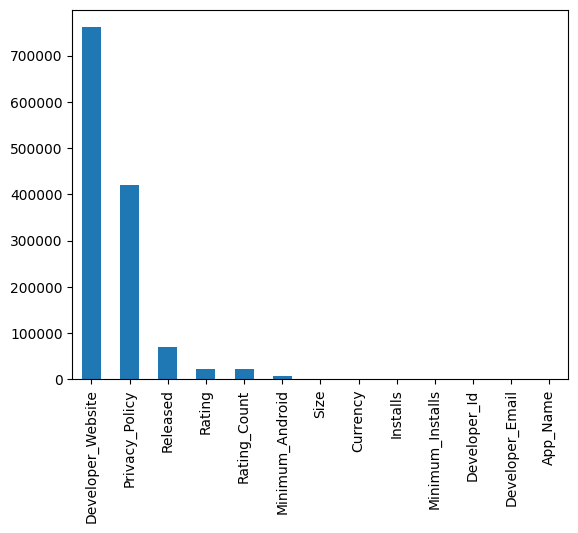

In [179]:
missing = df.isna().sum().sort_values(ascending = False)
missing[missing > 0].plot(kind = 'bar')

Developer Website, Privacy Policy and Released have the most missing values. Luckily, we don't really need these. So let's drop these now. Let's also drop any other columns that we don't need, even if they have little to no missing values. We are going to drop Developer Id, Developer Email, and Scraped Time.

In [180]:
df.drop(columns=['Developer_Website', 'Privacy_Policy', 'Released', 'Developer_Id', 'Developer_Email', 'Scraped_Time'], inplace = True)

Let's take another look at our missing values.

In [181]:
missing

Developer_Website    760835
Privacy_Policy       420953
Released              71053
Rating                22883
Rating_Count          22883
Minimum_Android        6530
Size                    196
Currency                135
Installs                107
Minimum_Installs        107
Developer_Id             33
Developer_Email          31
App_Name                  2
App_Id                    0
Price                     0
Free                      0
Maximum_Installs          0
Last_Updated              0
Content_Rating            0
Category                  0
Ad_Supported              0
In_App_Purchases          0
Editors_Choice            0
Scraped_Time              0
dtype: int64

Next, we want to drop the rows where there is insufficient data for the rest of the columns with null values as these won't help with our analysis

In [182]:
df.dropna(inplace = True)

One last look at our missing values.

In [221]:
missing = df.isna().sum().sort_values(ascending = False)
missing

App_Name            0
App_Id              0
In_App_Purchases    0
Ad_Supported        0
Content_Rating      0
Last_Updated        0
Minimum_Android     0
Size                0
Currency            0
Price               0
Free                0
Maximum_Installs    0
Minimum_Installs    0
Installs            0
Rating_Count        0
Rating              0
Category            0
Editors_Choice      0
dtype: int64

Now let's see how many rows we are working with.

In [184]:
len(df)

2283513

Now we have no missing values.

## Ask Questions

What are the top 10 categories in terms of downloads?<br>
What are the top downloaded apps in each of these categories?<br>
What are the top 10 categories in terms of ratings?<br>
Do free apps or paid apps have a higher rating?<br>
Do ad supported apps or non-ad supported apps have a higher or lower rating?<br>

## Exploratory Analysis and Visualization<br>

Let's do some analysis on our data in order to answer our questions.


Let's start with our first question. What are the top 10 categories in terms of downloads?

In [185]:
df.Category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

Let's see how many categories we have.

In [186]:
len(df.Category.unique())

48

Let's look at how many apps are in each category.

In [187]:
categories_by_apps = df.Category.value_counts()
categories_by_apps[:10]

Education            239243
Music & Audio        154380
Business             141628
Tools                141362
Entertainment        137280
Lifestyle            117586
Books & Reference    116349
Personalization       88785
Health & Fitness      82339
Productivity          77847
Name: Category, dtype: int64

Let's visualize this.

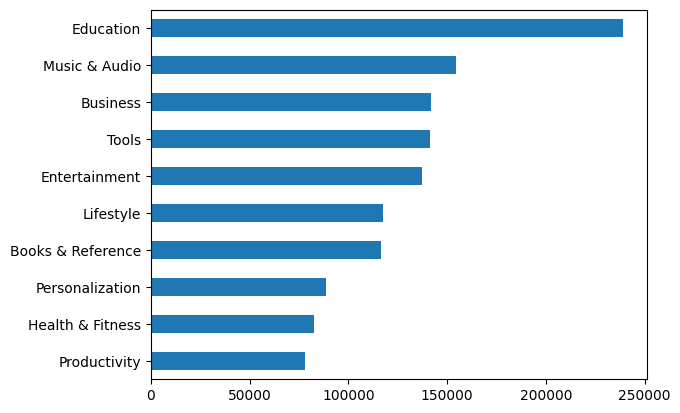

In [188]:
categories_by_apps[:10].plot(kind = 'barh').invert_yaxis()

It looks like Education has the most apps in the Google Play Store.

Let's look at the categories with the least number of apps.

In [189]:
categories_by_apps[-10:]

Word                8512
Strategy            8200
Card                8025
Weather             7105
Dating              6418
Libraries & Demo    5048
Casino              5019
Music               4128
Parenting           3747
Comics              2815
Name: Category, dtype: int64

Now, let's visualize this one.

<bound method _AxesBase.invert_yaxis of <AxesSubplot:>>

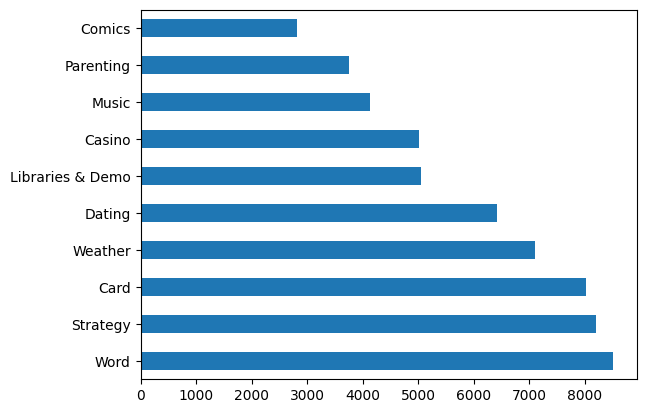

In [190]:
categories_by_apps[-10:].plot(kind = 'barh').invert_yaxis

This graph shows that the Comics section has the least number of apps in the Google Play Store.

Let's see which categories are the most popular based on the number of installs. We will be using the Maximum Installs column to calculate this.

In [191]:
category_installs = df.groupby(['Category'])[['Maximum_Installs']].sum().sort_values(by = 'Maximum_Installs', ascending = False)
category_installs.head(10)

,Maximum_Installs
Category,
Tools,117343276840
Communication,71510826612
Productivity,45173883306
Entertainment,32482686631
Social,32210378179
Video Players & Editors,31419003364
Photography,31143166165
Action,30684040392
Casual,30439738978


Let's visualize this.

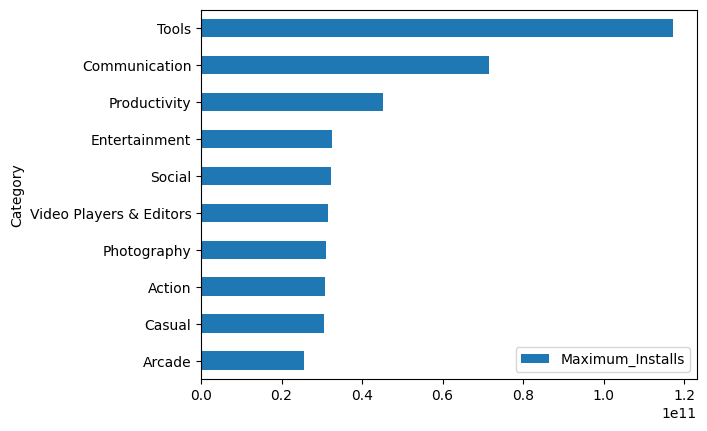

In [192]:
category_installs.head(10).plot(kind = 'barh').invert_yaxis()

The graph shows that the top 10 categories are:<br>
Tools<br>
Communication<br>
Productivity<br>
Entertainment<br>
Social<br>
Video Players & Editors<br>
Photography<br>
Action<br>
Casual<br>
Arcade<br>

This answers one of our questions.

Let's do some more analysis and answer our next question. What are the top downloaded apps in each of these categories?

First, let's find out the top downloaded apps in general.

In [193]:
top_app_names = df.groupby('App_Name')[['Maximum_Installs']].sum().sort_values(by = 'Maximum_Installs', ascending = False)
top_app_names.head(10)

,Maximum_Installs
App_Name,
Google Play services,12057627016
YouTube,9766230924
Google,9154248491
Google Maps - Navigate & Explore,9141671889
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Android Accessibility Suite,7408134567
Google Drive,7028265259


Let's visualize this.

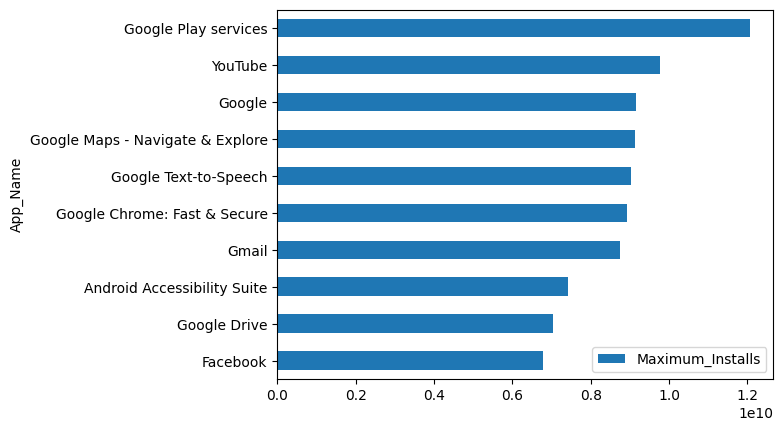

In [194]:
top_app_names.head(10).plot(kind = 'barh').invert_yaxis()

It looks like Google Play services is the most installed. However, this is loaded onto all Android devices automatically. Let's drop this value.

In [195]:
df = df[df.App_Name != 'Google Play services']

Let's visualize this again

In [196]:
top_app_names = df.groupby('App_Name')[['Maximum_Installs']].sum().sort_values(by = 'Maximum_Installs', ascending = False)
top_app_names.head(10)

,Maximum_Installs
App_Name,
YouTube,9766230924
Google,9154248491
Google Maps - Navigate & Explore,9141671889
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Android Accessibility Suite,7408134567
Google Drive,7028265259
Facebook,6782619635


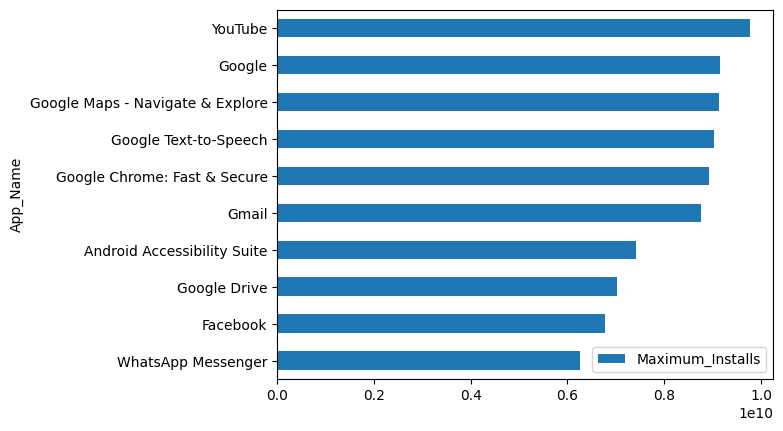

In [197]:
top_app_names.head(10).plot(kind = 'barh').invert_yaxis()

Let's look at the top apps per category.

We'll start by filtering out any apps that are not in the top 10 categories.

In [198]:
top_10_cat = ['Tools', 'Communication', 'Productivity', 'Entertainment', 'Social', 'Video Players & Editors', 'Photography', 'Action', 'Casual', 'Arcade']
apps_with_top_10_cat = df[df.Category.isin(top_10_cat)]


apps_with_top_10_cat.head(10)



,App_Name,App_Id,Category,Rating,Rating_Count,Installs,Minimum_Installs,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,"Nov 12, 2018",Everyone,False,False,False
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,6.0 and up,"Dec 20, 2019",Teen,False,True,False
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,USD,1.3M,4.4 and up,"Dec 07, 2018",Teen,False,False,False
17,All in one shopping app,com.tkapplications.allinoneshoppingapp,Tools,5.0,6.0,50+,50.0,62,True,0.0,USD,2.0M,4.1 and up,"May 05, 2019",Everyone,False,False,False
20,Nepali Congress,np.com.NepaliCongress,Social,0.0,0.0,100+,100.0,336,True,0.0,USD,24M,5.0 and up,"May 31, 2021",Everyone,False,False,False
23,Coloring Book Barbaie,com.bisgumah.barbie,Entertainment,3.8,736.0,"500,000+",500000.0,646456,True,0.0,USD,20M,5.0 and up,"Nov 13, 2020",Everyone,True,False,False
24,Random Number Generator,com.gary.randomnumber,Tools,4.2,35.0,"10,000+",10000.0,21124,True,0.0,USD,2.4M,5.0 and up,"May 30, 2020",Everyone,True,False,False


Now, let's drop any columns that are not App_Name, Category and Maximum_Installs then sort by Maximum_Installs.

In [199]:
filtered_top_apps_by_cat = apps_with_top_10_cat[['App_Name', 'Category', 'Maximum_Installs']].sort_values(by = 'Maximum_Installs', ascending = False)
filtered_top_apps_by_cat.head(10)

,App_Name,Category,Maximum_Installs
881403,YouTube,Video Players & Editors,9766230924
1773294,Google,Tools,9154248491
1060335,Google Text-to-Speech,Tools,9034404884
944254,Google Chrome: Fast & Secure,Communication,8925640788
2099458,Gmail,Communication,8756574289
2011395,Android Accessibility Suite,Tools,7408134567
893676,Google Drive,Productivity,7028265259
2222701,Facebook,Social,6782619635
385470,WhatsApp Messenger,Communication,6265637751
167781,Google TV (previously Play Movies & TV),Video Players & Editors,6156518915


Now, let's get the top app for each category.

In [200]:
top_app_names_by_cat = {'Tools': '', 'Communication': '', 'Productivity': '', 'Entertainment': '', 'Social': '', 'Video Players & Editors': '', 'Photography': '', 'Action': '', 'Casual': '', 'Arcade': ''}

for x in top_10_cat:
    filtered = filtered_top_apps_by_cat[filtered_top_apps_by_cat['Category'] == x]
    name = filtered.iloc[0]['App_Name']
    top_app_names_by_cat[x] = name

Here's the list of the top apps by category.

In [201]:
top_app_names_by_cat

{'Tools': 'Google',
 'Communication': 'Google Chrome: Fast & Secure',
 'Productivity': 'Google Drive',
 'Entertainment': 'Google Play Games',
 'Social': 'Facebook',
 'Video Players & Editors': 'YouTube',
 'Photography': 'Google Photos',
 'Action': 'Garena Free Fire - Rampage',
 'Casual': 'Candy Crush Saga',
 'Arcade': 'Subway Surfers'}

This answers another one of our questions.

Let's move onto our next question. What are the top 10 categories in terms of ratings?

Let's start off by filtering out any unnecessary columns. To get more accurate results, we'll also filter out any records with less than 10 ratings.

In [202]:
df_r = df[['Category', 'Rating', 'Rating_Count']]
df_r = df_r[df_r.Rating_Count > 10]

Now, let's drop the Rating_Count column.

In [203]:
df_r = df_r[['Category', 'Rating']]
df_r

,Category,Rating
1,Tools,4.4
6,Libraries & Demo,4.5
7,Lifestyle,2.0
9,Personalization,4.7
10,Racing,4.9
...,...,...
2312932,Action,4.3
2312933,Music & Audio,4.0
2312938,Education,3.4
2312939,Role Playing,4.3


Let's get the top categories by rating. We will do this by calculating the mean of each category's rating.

In [204]:
rating_mean = {}
for x in df_r['Category']:
    if x not in rating_mean:
        rating_mean[x] = None
rating_mean

{'Tools': None,
 'Libraries & Demo': None,
 'Lifestyle': None,
 'Personalization': None,
 'Racing': None,
 'Travel & Local': None,
 'Food & Drink': None,
 'Puzzle': None,
 'Entertainment': None,
 'Arcade': None,
 'Maps & Navigation': None,
 'Auto & Vehicles': None,
 'Photography': None,
 'Health & Fitness': None,
 'Shopping': None,
 'Books & Reference': None,
 'Sports': None,
 'Finance': None,
 'Music & Audio': None,
 'News & Magazines': None,
 'House & Home': None,
 'Education': None,
 'Business': None,
 'Card': None,
 'Events': None,
 'Productivity': None,
 'Weather': None,
 'Board': None,
 'Social': None,
 'Adventure': None,
 'Medical': None,
 'Strategy': None,
 'Word': None,
 'Beauty': None,
 'Video Players & Editors': None,
 'Action': None,
 'Simulation': None,
 'Casual': None,
 'Music': None,
 'Trivia': None,
 'Art & Design': None,
 'Dating': None,
 'Role Playing': None,
 'Communication': None,
 'Comics': None,
 'Educational': None,
 'Casino': None,
 'Parenting': None}

In [205]:
for x in rating_mean:
    mean = df_r.loc[df_r['Category'] == x, 'Rating'].mean()
    rating_mean[x] = mean
rating_mean

{'Tools': 3.9005776077290117,
 'Libraries & Demo': 4.064004149377594,
 'Lifestyle': 4.0787608509014595,
 'Personalization': 4.255260108299446,
 'Racing': 3.974141161773891,
 'Travel & Local': 3.9985190654043254,
 'Food & Drink': 4.11263040482908,
 'Puzzle': 4.204816955684007,
 'Entertainment': 3.985843682179889,
 'Arcade': 4.203059952923801,
 'Maps & Navigation': 3.8657999337528985,
 'Auto & Vehicles': 3.840518455903071,
 'Photography': 3.8951903485254693,
 'Health & Fitness': 3.981368867353119,
 'Shopping': 4.112893958597381,
 'Books & Reference': 4.304775711773729,
 'Sports': 4.048170272812794,
 'Finance': 3.9530999936991993,
 'Music & Audio': 4.296524016037967,
 'News & Magazines': 4.1118892175864525,
 'House & Home': 3.747564766839378,
 'Education': 4.188984746697159,
 'Business': 3.9678647121158597,
 'Card': 4.032094406244192,
 'Events': 4.236554438128553,
 'Productivity': 3.9744957893991932,
 'Weather': 4.119607023411372,
 'Board': 4.044205354117248,
 'Social': 4.143537622904886,

In [206]:
rating_mean = sorted(rating_mean.items(), key = lambda kv:kv[1], reverse = True)
rating_mean

[('Books & Reference', 4.304775711773729),
 ('Music & Audio', 4.296524016037967),
 ('Personalization', 4.255260108299446),
 ('Events', 4.236554438128553),
 ('Word', 4.21651376146789),
 ('Puzzle', 4.204816955684007),
 ('Arcade', 4.203059952923801),
 ('Education', 4.188984746697159),
 ('Casino', 4.1459062676453975),
 ('Social', 4.143537622904886),
 ('Weather', 4.119607023411372),
 ('Shopping', 4.112893958597381),
 ('Food & Drink', 4.11263040482908),
 ('News & Magazines', 4.1118892175864525),
 ('Educational', 4.106897971790383),
 ('Lifestyle', 4.0787608509014595),
 ('Casual', 4.07509840758633),
 ('Trivia', 4.073349381017882),
 ('Libraries & Demo', 4.064004149377594),
 ('Adventure', 4.051331572991324),
 ('Sports', 4.048170272812794),
 ('Board', 4.044205354117248),
 ('Communication', 4.041549447009556),
 ('Card', 4.032094406244192),
 ('Medical', 4.028065034502316),
 ('Beauty', 4.023352680095596),
 ('Parenting', 4.014539400665926),
 ('Travel & Local', 3.9985190654043254),
 ('Art & Design', 3

Now, let's plot the top 10.

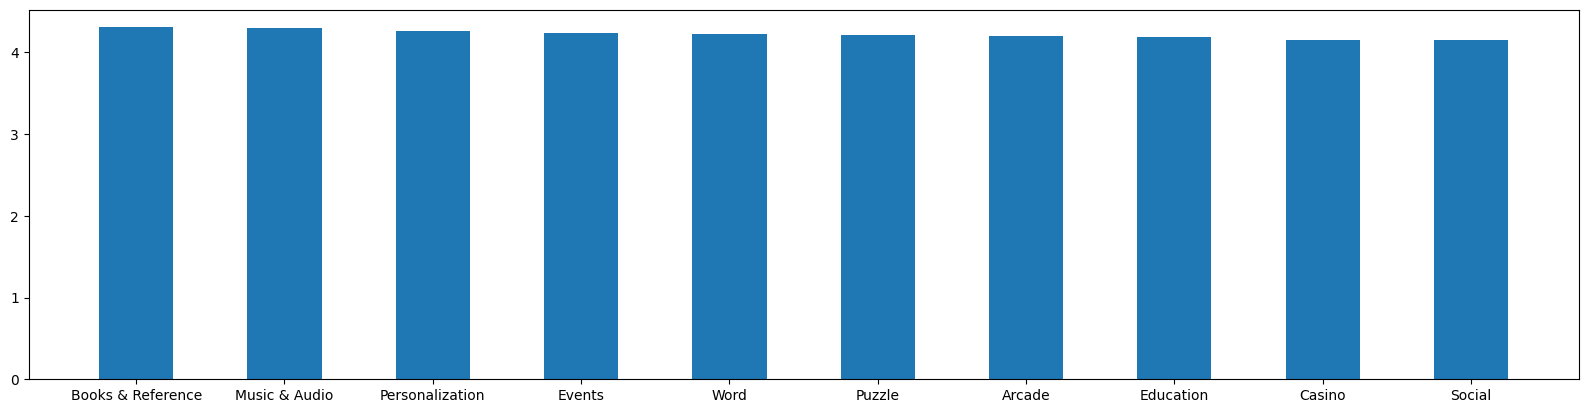

In [207]:
rating_mean = dict(rating_mean)
rating_mean = dict(list(rating_mean.items())[:10])


names = list(rating_mean.keys())
values = list(rating_mean.values())

plt.figure(figsize=(20,4.8))
plt.bar(range(len(rating_mean)), values, tick_label = names, width = 0.5)

plt.show()


This answers our next question.

Let's move onto our next question. What are the top 10 apps, by rating in each of these categories? (minimum of 250 ratings)

First, let's isolate the necessary columns.

In [208]:
df_ra = df[['App_Name', 'Category', 'Rating', 'Rating_Count']]
df_ra

,App_Name,Category,Rating,Rating_Count
0,Gakondo,Adventure,0.0,0.0
1,Ampere Battery Info,Tools,4.4,64.0
2,Vibook,Productivity,0.0,0.0
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0
4,GROW.me,Tools,0.0,0.0
...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0
2312940,ORU Online,Education,0.0,0.0
2312941,Data Structure,Education,0.0,0.0
2312942,Devi Suktam,Music & Audio,3.5,8.0


Now, we will get rid of any entries with less than 101 ratings.

In [209]:
df_ra = df_ra[df_ra.Rating_Count > 249]
df_ra

,App_Name,Category,Rating,Rating_Count
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0
14,Caliway Conductor,Travel & Local,3.7,1572.0
18,REDMOND Robot,Lifestyle,3.7,328.0
23,Coloring Book Barbaie,Entertainment,3.8,736.0
34,Vancouver Bus Tracker,Maps & Navigation,2.3,420.0
...,...,...,...,...
2312913,Moneygment,Finance,2.0,1687.0
2312931,Driving Day,Entertainment,2.8,1002.0
2312932,Hopeless 2: Cave Escape,Action,4.3,103466.0
2312933,Caustic Editor for VolcaSample,Music & Audio,4.0,344.0


Let's drop any records that are not in the categories we found above.

In [210]:
rat_cats = ['Books & Reference', 'Music & Audio', 'Personalization', 'Events', 'Word', 'Puzzle', 'Arcade', 'Education', 'Casino', 'Social']
df_ra = df_ra[df_ra.Category.isin(rat_cats)]
df_ra

,App_Name,Category,Rating,Rating_Count
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0
61,Learn Electrical Engineering,Books & Reference,4.1,337.0
83,GO SMS PRO CRYSTAL THEME,Personalization,4.0,452.0
114,Cute Theme Fluffy Love,Personalization,4.3,473.0
126,Taariikhda Soomaaliya - History of Somalia,Books & Reference,4.3,261.0
...,...,...,...,...
2312719,حل لعبة وصلة 2,Word,4.2,1606.0
2312760,Bouncy Ballz,Arcade,3.7,2003.0
2312782,Emojis - Puppy Emoji,Social,4.2,515.0
2312852,Evergreen e-Learning,Education,3.8,3026.0


Now, we'll find the top 10 apps in each category. Since multiple apps will probably be rated 5.0, we will choose the app that has the most ratings.

In [211]:
df_ra.sort_values(['Rating', 'Rating_Count'], inplace = True, ascending = False)
df_ra

C:\Users\ddrom\AppData\Local\Temp\ipykernel_27576\271982612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ra.sort_values(['Rating', 'Rating_Count'], inplace = True, ascending = False)


,App_Name,Category,Rating,Rating_Count
845049,STUDiLMU: Your One-stop Solution Learning Partner,Education,5.0,42908.0
609994,"Жәннат Фирдаус - Намаз, Құран оқуды үйрену",Education,5.0,18031.0
2134769,Last Bird Trip - Free Flappy Birdie Arcade Game,Arcade,5.0,12901.0
1479168,Hayalhanem,Education,5.0,11444.0
530856,21 Dias de Jejum (Jejum de Daniel),Education,5.0,10990.0
...,...,...,...,...
1986318,HKDSE,Education,1.1,1164.0
748716,Qurio,Education,1.1,979.0
1978091,DragonFruit,Social,1.1,859.0
1594710,Open Shymkent,Social,1.1,537.0


In [212]:
rat_cats = {'Books & Reference': '', 'Music & Audio': '', 'Personalization': '', 'Events': '', 'Word': '', 'Puzzle': '', 'Arcade': '', 'Education': '', 'Casino': '', 'Social': ''}
for x in rat_cats:
    filtered = df_ra[df_ra['Category'] == x]
    name = filtered.iloc[0]['App_Name']
    rat_cats[x] = name

rat_cats

{'Books & Reference': 'Babel Novel - Fantastic Books & Webnovel Reading',
 'Music & Audio': 'Music Player - Audio Player',
 'Personalization': 'HD Wallpapers (Offline)',
 'Events': 'JanaSena News & Events',
 'Word': 'Sözcük Gezmece',
 'Puzzle': 'Jigsaw Kingdoms - puzzle game',
 'Arcade': 'Last Bird Trip - Free Flappy Birdie Arcade Game',
 'Education': 'STUDiLMU: Your One-stop Solution Learning Partner',
 'Casino': 'Slots: Jackpot & Casino Slot free',
 'Social': 'DJJS'}

This answers our question.

Onto the next question: Do free apps or paid apps have a higher rating? (minimum of 100 ratings)

Let's start by filtering out the necessary columns.

In [213]:
df_fp = df[['Rating', 'Free', 'Rating_Count']]
df_fp = df_fp[df_fp.Rating_Count > 99]
df_fp

,Rating,Free,Rating_Count
9,4.7,True,820.0
12,3.9,True,118.0
14,3.7,True,1572.0
18,3.7,True,328.0
22,4.4,True,211.0
...,...,...,...
2312913,2.0,True,1687.0
2312931,2.8,True,1002.0
2312932,4.3,True,103466.0
2312933,4.0,True,344.0


Now, we'll find the mean of the paid apps.

In [214]:
p_mean = df_fp.loc[df_fp['Free'] == False, 'Rating'].mean()
p_mean

4.162039811643837

Now, for the free apps.

In [215]:
f_mean = df_fp.loc[df_fp['Free'] == True, 'Rating'].mean()
f_mean

4.024451365768088

Let's visualize this.

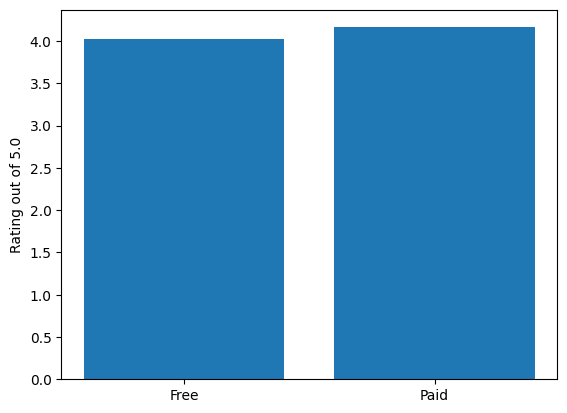

In [216]:
plt.bar(['Free', 'Paid'], [f_mean, p_mean])
plt.ylabel('Rating out of 5.0')
plt.show()

This answers our question.

Let's move onto our last question. Do ad supported apps or non-ad supported apps have a higher rating? (minimum of 100 ratings.)

Start out by filtering the necessary columns.

In [217]:
df_ans = df[['Rating', 'Rating_Count', 'Ad_Supported']]
df_ans = df_ans[df_ans.Rating_Count > 99]
df_ans

,Rating,Rating_Count,Ad_Supported
9,4.7,820.0,True
12,3.9,118.0,True
14,3.7,1572.0,False
18,3.7,328.0,False
22,4.4,211.0,True
...,...,...,...
2312913,2.0,1687.0,False
2312931,2.8,1002.0,True
2312932,4.3,103466.0,True
2312933,4.0,344.0,False


Now, let's calculate the mean for ad-supported apps.

In [218]:
as_mean = df_ans.loc[df_ans['Ad_Supported'] == True, 'Rating'].mean()
as_mean

4.088349459670337

Now, the mean for non ad-supported apps.

In [219]:
nas_mean = df_ans.loc[df_ans['Ad_Supported'] == False, 'Rating'].mean()
nas_mean

3.908492653861811

Let's plot this.

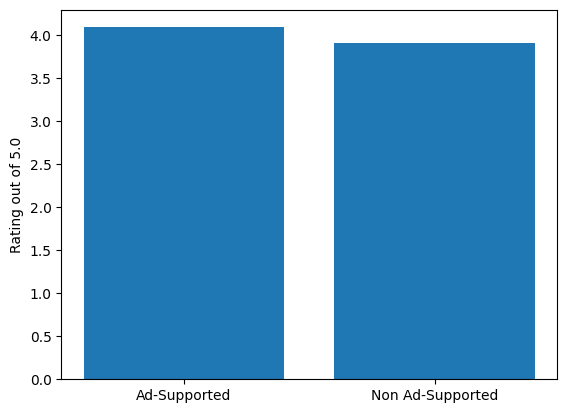

In [220]:
plt.bar(['Ad-Supported', 'Non Ad-Supported'], [as_mean, nas_mean])
plt.ylabel('Rating out of 5.0')
plt.show()

It looks like the ad-supported apps have a higher rating than the non ad-supported apps.

This answers our final question.

## Answer Questions

### What are the top 10 categories in terms of downloads?<br>
1. Tools<br>
2. Communication<br>
3. Productivity<br>
4. Entertainment<br>
5. Social<br>
6. Video Players & Editors<br>
7. Photography<br>
8. Action<br>
9. Casual<br>
10. Arcade<br>

### What are the top downloaded apps in each of these categories?<br>
<li>Tools: Google</li>
<li>Communication: Google Chrome: Fast & Secure</li>
<li>Productivity: Google Drive</li>
<li>Entertainment: Google Play Games</li>
<li>Social: Facebook</li>
<li>Video Players & Editors: YouTube</li>
<li>Photography: Google Photos</li>
<li>Action: Garena Free Fire - Rampage</li>
<li>Casual: Candy Crush Saga</li>
<li>Arcade: Subway Surfers</li>

### What are the top 10 categories in terms of ratings? (minimum of 10 ratings, rounded to 3 decimal places)<br>
1. Books & Reference: 4.305 stars
2. Music & Audio: 4.297 stars
3. Personalization: 4.255 stars
4. Events: 4.237 stars
5. Word: 4.217 stars
6. Puzzle: 4.205 stars
7. Arcade: 4.203 stars
8. Education: 4.189 stars
9. Casino: 4.146 stars
10. Social: 4.144 stars

### What are the top 10 apps, by rating in each of these categories? (minimum of 250 ratings)
<li>Books & Reference: Babel Novel - Fantastic Books & Webnovel Reading</li>
<li>Music & Audio: Music Player - Audio Player</li>
<li>Personalization: HD Wallpapers (Offline)</li>
<li>Events: JanaSena News & Events</li>
<li>Word: Sözcük Gezmece</li>
<li>Puzzle: Jigsaw Kingdoms - puzzle game</li>
<li>Arcade: Last Bird Trip - Free Flappy Birdie Arcade Game</li>
<li>Education: STUDiLMU: Your One-stop Solution Learning Partner</li>
<li>Casino: Slots: Jackpot & Casino Slot free</li>
<li>Social: DJJS</li>

### Do free apps or paid apps have a higher rating? (minimum of 100 ratings)
Paid apps have a higher rating. Paid apps have an average of 4.162 stars, while free apps have an average of 4.024 stars. Ratings are rounded to 3 decimal places.

### Do ad supported apps or non-ad supported apps have a higher rating? (minimum of 100 ratings.)

Ad-supported apps have a higher rating than non ad-supported apps. Ad-supported apps have an average of 4.088 stars. Non ad-supported apps have an average of 3.908 stars. Ratings are rounded to 3 decimals places.

## Summary and Conclusion

People seem to download Tools, Communication and Productivity apps more than any other apps, as these are the top 3 categories in terms of downloads. It is possible that this is skewed or biased because of apps like Google, which comes preloaded on every Android device. This is shown by our analysis of the top downloaded apps in the top 10 categories. The top apps in 6 of the categories are Google apps. <br>

I think our analysis of the top categories by ratings gives us a clearer picture of what apps are favored more by consumers. This is because people choose to leave ratings, which reflects the opinion of the public more. It is also better because there is a range of 0.0 through 5.0 to base our analysis on, while the install count is just a single count of installs. Books & Reference is the top category based on this metric.<br>

The next part of our analysis involved determining whether free or paid apps had a higher rating. The analysis showed that paid apps have a higher rating on average. This may be because that in order to justify charging money for an app, the app has to be high-quality enough for a customer to want to buy it.<br>

The final part of our analysis determined that ad-supported apps have a higher rating than non ad-supported apps. This could be for the same reason that paid apps are rated higher than free apps. The ad-supported apps may be higher quality, but instead of charging money for apps, developers will implement ads and list the applciation in the store for free.